In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import matplotlib as plt

In [14]:
df = pd.read_csv('./data/PCA_Output.csv').drop('Unnamed: 0', axis=1)
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,Year,Round,School
0,44.488013,13.451983,17.215303,15.516061,-1.392000,10.322120,-0.833705,5.512971,9.932289,0.306404,...,-1.952358,1.265309,2.922808,-0.524872,1.021296,-0.708134,-0.519683,1,0,Duke
1,2.141548,-8.058277,5.556478,-10.172859,9.089618,1.121069,7.020399,1.294642,5.613959,1.230927,...,-1.255755,-2.200641,-0.754523,0.183981,1.142544,-1.451628,0.074957,4,0,Connecticut
2,22.148220,3.858848,-4.308118,2.385105,-7.294075,-3.227119,-2.024828,-1.642130,1.684555,-0.747842,...,-0.422080,-0.253577,0.585204,0.350586,-1.001076,-1.680653,1.665078,10,0,Duke
3,8.911110,-11.482865,9.480825,-10.883555,-1.270769,1.009218,2.371393,-1.351887,-4.145126,-2.918149,...,0.485580,-1.087791,-2.293007,1.356170,1.099706,-1.668532,0.767453,0,0,Michigan State
4,28.242471,5.259683,10.714157,3.375753,-5.324363,-6.114989,6.478768,-4.972679,2.294216,-2.136309,...,1.349417,2.037605,2.970757,-3.331529,-3.134163,-2.338882,-0.178971,6,0,Florida


In [15]:
df_test = df.sample(frac=.2, replace=False).copy()
df_train = df.drop(df_test.index).copy()

features_train = df_train.drop(['Year', 'Round', 'School'], axis=1)
features_test = df_test.drop(['Year', 'Round', 'School'], axis=1)

targets_train = df_train.Round
targets_test = df_test.Round

In [16]:
gbt = GradientBoostingRegressor(max_depth=3, n_estimators=5000, learning_rate=.01)
gbt.fit(features_train, targets_train)

training = []

for target_train_predict in gbt.staged_predict(features_train):
    R2_train = r2_score(targets_train, target_train_predict)
    training.append(R2_train)
    
testing = []
RMSE_test = []
for target_test_predict in gbt.staged_predict(features_test):
    R2_test = r2_score(targets_test, target_test_predict)
    testing.append(R2_test)
    RMSE_test.append(np.sqrt(mean_squared_error(targets_test, target_test_predict)))
    
res = pd.DataFrame()
res['test'] = testing
res['train'] = training
res['RMSE'] = RMSE_test

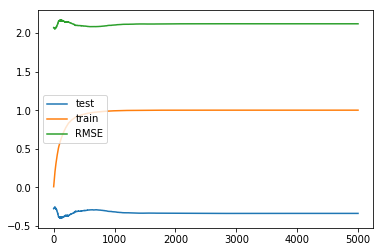

In [17]:
res.plot()

In [18]:
print(res.test.idxmax(), res.test.max())
print(res.RMSE.idxmin(), res.RMSE.min())

19 -0.2549818525472265
19 2.0526869663433724


In [19]:
gbt = GradientBoostingClassifier(max_depth=3, n_estimators=5000, learning_rate=.01)
gbt.fit(features_train, targets_train)

training = []

for target_train_predict in gbt.staged_predict(features_train):
    R2_train = r2_score(targets_train, target_train_predict)
    training.append(R2_train)
    
testing = []
RMSE_test = []
for target_test_predict in gbt.staged_predict(features_test):
    R2_test = r2_score(targets_test, target_test_predict)
    testing.append(R2_test)
    RMSE_test.append(np.sqrt(mean_squared_error(targets_test, target_test_predict)))
    
res = pd.DataFrame()
res['test'] = testing
res['train'] = training
res['RMSE'] = RMSE_test

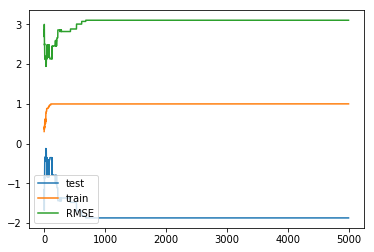

In [20]:
res.plot()

In [21]:
print(res.test.idxmax(), res.test.max())
print(res.RMSE.idxmin(), res.RMSE.min())

27 -0.12369230769230755
27 1.9423509653837725


In [24]:
grid = {'max_depth': np.arange(1,3),
       'n_estimators': [i*25 for i in np.arange(20,25)],
       'learning_rate': [.1**i for i in np.arange(1,3)]}

gbt = GradientBoostingClassifier()
gbtCV = GridSearchCV(gbt, param_grid=grid, return_train_score=True, n_jobs=-1)
gbtCV.fit(features_train, targets_train)

print(gbtCV.best_params_, gbtCV.best_score_)

print(gbtCV.score(features_test, targets_test))

pred = gbtCV.predict(features_test)

print(np.mean(abs(pred - targets_test)))

{'learning_rate': 0.010000000000000002, 'max_depth': 1, 'n_estimators': 525} 0.2777777777777778
0.18181818181818182
2.1818181818181817


learning_rate: .00005, 2, 750

In [23]:
pred

array([3, 3, 3, 0, 0, 6, 3, 2, 1, 0, 3, 0, 3, 1, 1, 5, 6, 2, 2, 6, 5, 2],
      dtype=int64)